In [31]:
from astropy.time import Time
from astropy.coordinates.calculation import horoscope
saskia = Time("1996-06-24T08:00")
axel = Time("1994-11-27T08:00")
gustav = Time("1991-09-18T22:00")
miriam = Time("1993-04-20T04:00")
horoscope(miriam,corrected=True)

*******************************************************************************
Horoscope for Aries on 2025-02-05:
*******************************************************************************
Be a source of comfort and stability for yourself and those you hold dear,
darling ram, as the Taurus moon and Mars rx form a soft yet sweet aspect. Focus
on strengthening your financial independence when Luna and Uranus join forces,
breaking free from situations that feel restrictive so you can spread your
wings. Dreamy vibes take hold this evening when Neptune and the nodes of fate
activate, inviting you to relax at home while letting the imagination run wild.
Bring shape to your visions later tonight when the moon enters Gemini,
strengthening your ability to think critically and problem-solve.


asdf[1. 1.]


/tmp/ipykernel_7110/3069895015.py:52: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(exp_decay, time, counts)#, sigma=errors, absolute_sigma=True)


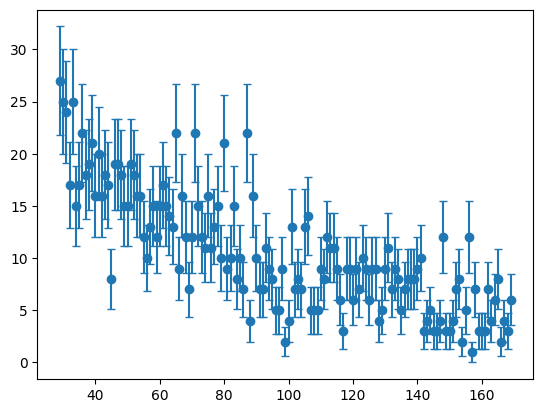

In [178]:
import numpy as np
import pandas as pd
import math as m
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Messdaten (Zeit in ns, gemessene Ereignisse)
duration=156657
counts = pd.read_csv("../data/Axel_neu.Spe", skiprows=12, skipfooter=15, names=['counts'], engine='python').astype(float).to_numpy()
counts = np.ravel(counts)
counts = counts[:max]

n = 5
max = 34*n
search_time = 30 # ns
def reduce_counts_to_mean(counts, n, max):
    reduced_counts=np.array([])
    reduced_counts_error = np.array([])
    divisor = 1/np.sqrt(n)
    for k in range(0,max, n):
        counts_mean = np.mean(counts[k:k+n])
        counts_error = np.std(counts[k:k+n])*divisor

        reduced_counts = np.append(reduced_counts,counts_mean)
        reduced_counts_error = np.append(reduced_counts_error,counts_error)
    
    return reduced_counts, reduced_counts_error

def cutter(time, counts, min, max):
    cut_time = np.append(time[:min],time[max:])
    cut_counts = np.append(counts[:min],counts[max:])

    return cut_time, cut_counts

counts_mean, counts_error = reduce_counts_to_mean(counts, n, max) 

time = np.arange(0,max,1)
# plt.scatter(time,counts[:max])

time, counts = cutter(time,counts,0,29)

errors = np.sqrt(counts)  # Poisson-Fehler als Wurzel der Zählrate

plt.errorbar(time, counts, yerr=errors, fmt='o', label="Messwerte", capsize=3)

np.arange(0,duration, search_time)
# Exponentielles Modell für den Zerfall: N(t) = N0 * exp(-t / tau)
def exp_decay(t, N0, tau):
    return N0 * np.exp(-t / tau)

# Fit durchführen
popt, pcov = curve_fit(exp_decay, time, counts)#, sigma=errors, absolute_sigma=True)
N0_fit, tau_fit = popt
N0_err, tau_err = np.sqrt(np.diag(pcov))

# # Fitkurve erzeugen
# # t_fit = np.linspace(0, 100, 200)
# counts_fit = exp_decay(time, N0_fit, tau_fit)
# print(counts_fit)

# # Plotten der Messdaten mit Fehlerbalken und Fitkurve
# plt.scatter(time, counts, label="Messwerte", marker="1")
# plt.xlabel("Zeit (ns)")
# plt.ylabel("Ereignisse")
# plt.yscale("log")  # Log-Skalierung wegen exponentiellem Zerfall
# plt.legend()
# plt.title("Exponentieller Zerfall von kosmischen Myonen")
# plt.grid()
# plt.show()

# # Fit-Parameter ausgeben
# N0_fit, N0_err, tau_fit, tau_err

/tmp/ipykernel_7110/1977747286.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


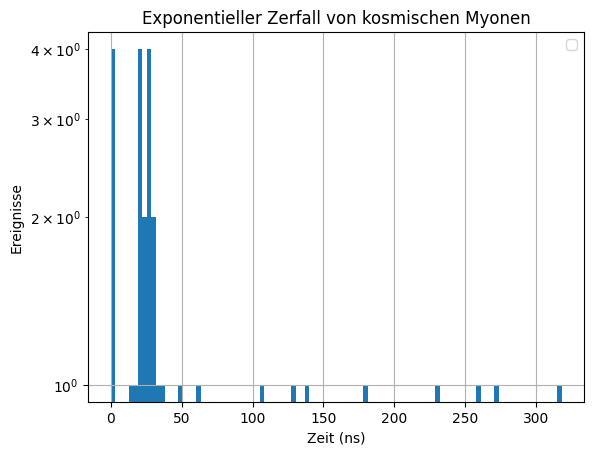

Fit-Parameter: N0 = 1.0 ± inf, tau = 1.0 ± inf


In [118]:
# Messdaten (Zeit in ns, gemessene Ereignisse)
duration=156657
counts = pd.read_csv("../data/Axel_neu.Spe", skiprows=12, skipfooter=15, names=['counts'], engine='python').astype(float).to_numpy()[:30]
counts = np.ravel(counts)
search_time = 30 # ns
time = np.arange(0,len(counts)*search_time, search_time)

# Plotten der Messdaten mit Fehlerbalken und Fitkurve
plt.hist(counts, bins=100)
plt.xlabel("Zeit (ns)")
plt.ylabel("Ereignisse")
plt.yscale("log")  # Log-Skalierung wegen exponentiellem Zerfall
plt.legend()
plt.title("Exponentieller Zerfall von kosmischen Myonen")
plt.grid(True)
plt.show()

# Ausgabe der Fit-Parameter und ihrer Fehler
print(f"Fit-Parameter: N0 = {N0_fit:.1f} ± {N0_err:.1f}, tau = {tau_fit:.1f} ± {tau_err:.1f}")